In [2]:
using Revise
includet("diatomic.jl")

using .diatomic_jl.MoleculeTypes
using .diatomic_jl


In [2]:
MoleculeOperator = Molecule.generateMolecule(K40Rb87, 2)
beams = Dict("B" =>Hamiltonian.OpticalBeam([1.0, 1.0, 1.0], [0, 0, 1.0]))

Hmol_I = Hamiltonian.generateHamiltonian(MoleculeOperator,  Beams = beams);# dirE = [1.0, 0, 0])


In [3]:
Hmol_S = Hamiltonian.generateHamiltonianSparse(MoleculeOperator, dirE = [1.0, 0.0, 0.0]);

In [10]:
getBasisUC(Hmol)

324-element Vector{Vector{Float64}}:
 [0.0, 0.0, -1.5, 1.5, -4.0, 4.0]
 [0.0, 0.0, -1.5, 1.5, -3.0, 4.0]
 [0.0, 0.0, -1.5, 1.5, -2.0, 4.0]
 [0.0, 0.0, -1.5, 1.5, -1.0, 4.0]
 [0.0, 0.0, -1.5, 1.5, 0.0, 4.0]
 [0.0, 0.0, -1.5, 1.5, 1.0, 4.0]
 [0.0, 0.0, -1.5, 1.5, 2.0, 4.0]
 [0.0, 0.0, -1.5, 1.5, 3.0, 4.0]
 [0.0, 0.0, -1.5, 1.5, 4.0, 4.0]
 [0.0, 0.0, -0.5, 1.5, -4.0, 4.0]
 ⋮
 [2.0, 2.0, 1.5, 1.5, -4.0, 4.0]
 [2.0, 2.0, 1.5, 1.5, -3.0, 4.0]
 [2.0, 2.0, 1.5, 1.5, -2.0, 4.0]
 [2.0, 2.0, 1.5, 1.5, -1.0, 4.0]
 [2.0, 2.0, 1.5, 1.5, 0.0, 4.0]
 [2.0, 2.0, 1.5, 1.5, 1.0, 4.0]
 [2.0, 2.0, 1.5, 1.5, 2.0, 4.0]
 [2.0, 2.0, 1.5, 1.5, 3.0, 4.0]
 [2.0, 2.0, 1.5, 1.5, 4.0, 4.0]

In [26]:
AM_Toolbox.getBasisFC(Hmol.MolOp.basisTree, "N")

324-element Vector{Vector{Float64}}:
 [0.0, 0.0, 2.5, -2.5, 1.5, 4.0]
 [-1.0, 1.0, 2.5, -2.5, 1.5, 4.0]
 [0.0, 1.0, 2.5, -2.5, 1.5, 4.0]
 [1.0, 1.0, 2.5, -2.5, 1.5, 4.0]
 [-2.0, 2.0, 2.5, -2.5, 1.5, 4.0]
 [-1.0, 2.0, 2.5, -2.5, 1.5, 4.0]
 [0.0, 2.0, 2.5, -2.5, 1.5, 4.0]
 [1.0, 2.0, 2.5, -2.5, 1.5, 4.0]
 [2.0, 2.0, 2.5, -2.5, 1.5, 4.0]
 [0.0, 0.0, 2.5, -1.5, 1.5, 4.0]
 ⋮
 [0.0, 0.0, 5.5, 5.5, 1.5, 4.0]
 [-1.0, 1.0, 5.5, 5.5, 1.5, 4.0]
 [0.0, 1.0, 5.5, 5.5, 1.5, 4.0]
 [1.0, 1.0, 5.5, 5.5, 1.5, 4.0]
 [-2.0, 2.0, 5.5, 5.5, 1.5, 4.0]
 [-1.0, 2.0, 5.5, 5.5, 1.5, 4.0]
 [0.0, 2.0, 5.5, 5.5, 1.5, 4.0]
 [1.0, 2.0, 5.5, 5.5, 1.5, 4.0]
 [2.0, 2.0, 5.5, 5.5, 1.5, 4.0]

In [3]:

MoleculeOperator = Molecule.generateMolecule(K40Rb87T, 2)
Hmol = Hamiltonian.generateHamiltonian(MoleculeOperator, dirE = [1.0, 0.0, 0.0]);

In [4]:
param = solve.diagonalize(Hmol, 200e-4, 424e2)
#stateOI =  State([0.0, 1.0, 0.5, 1.5, -4.0, 4.0], Hmol)
stateOI =  State(param.vec[:, 37], Hmol)
_, eigvec, eigsol, tdm = calculate.findTransition(Hmol,stateOI,  param, comp = [1.0, 1.0, 1.0],[0], NumOfStates = 10)

Starting from 0.852 | -4.0, 1.5, 1.0, 0.0 > + 0.077 | -4.0, 0.5, 1.0, 1.0 > + 0.047 | -4.0, 0.5, 1.0, -1.0 >


State: 0.999 | -4.0, 1.5, 0.0, 0.0 > + 0.001 | -4.0, 1.5, 1.0, 1.0 > + 0.001 | -4.0, 1.5, 1.0, -1.0 >	| Energy (MHz): -2229.335588518519
	 TDM [sigma_m, pi, sigma_p] = [-2.9976720807534315e-14, -0.30774083715903344, -5.283716607917805e-14]
State: 0.999 | -4.0, 0.5, 0.0, 0.0 > + 0.001 | -4.0, 0.5, 1.0, 1.0 > + 0.001 | -4.0, 0.5, 1.0, -1.0 >	| Energy (MHz): -2229.065332024032
	 TDM [sigma_m, pi, sigma_p] = [-0.07200922084752563, -1.7347582746473092e-13, -0.09244607454419955]
State: 0.999 | -3.0, 1.5, 0.0, 0.0 > + 0.001 | -3.0, 1.5, 1.0, 1.0 > + 0.001 | -3.0, 1.5, 1.0, -1.0 >	| Energy (MHz): -2229.289335584926
	 TDM [sigma_m, pi, sigma_p] = [0.034995867521835505, -4.18528094310857e-14, 0.028643640484496972]
State: 0.999 | -4.0, -1.5, 0.0, 0.0 > + 0.001 | -4.0, -1.5, 1.0, 1.0 > + 0.001 | -4.0, -1.5, 1.0, -1.0 >	| Energy (MHz): -2228.5239950014834
	 TDM [sigma_m, pi, sigma_p] = [0.005634269142621388, 3.24339100156297e-14, 0.01115456557940215]
State: 0.998 | -2.0, 1.5, 0.0, 0.0 > + 0.001 | -

([1, 7, 2, 25, 3, 9, 18, 4, 16, 11  …  8, 28, 26, 34, 19, 12, 35, 30, 21, 36], ComplexF64[9.15551477996578e-18 + 0.0im -0.000350459053534111 + 0.0im … 5.3624020618706036e-17 + 0.0im 7.83370084513081e-8 + 0.0im; 5.447897247335359e-6 + 0.0im -2.0654618283874668e-14 + 0.0im … 0.01536987610627841 + 0.0im -9.604188574335536e-14 + 0.0im; … ; -9.230178989811419e-21 + 0.0im -3.460232236765424e-20 + 0.0im … -3.1524972001121126e-18 + 0.0im -2.534192398295713e-16 + 0.0im; 7.084462641936842e-20 - 0.0im 0.0 + 0.0im … 0.0 + 0.0im 0.0 + 0.0im], [-2.2293355885185194e9, -2.229065332024032e9, -2.229289335584926e9, -2.2285239950014834e9, -2.2292430703562007e9, -2.229016986223598e9, -2.2287443797007008e9, -2.2291967932325044e9, -2.228794800347319e9, -2.2289686430345163e9], [-2.9976720807534315e-14 -0.30774083715903344 -5.283716607917805e-14; -0.07200922084752563 -1.7347582746473092e-13 -0.09244607454419955; … ; -5.179653958732791e-14 -0.001824960049652415 -4.058797934891057e-14; 0.0007870365643156013 1.63

In [6]:
zeemanScan = solve.scanZeeman(Hmol, [190:0.1:210...]*1e-4, 420e2)#, nev = 10);
starkScan = solve.scanStark(Hmol, 0.1e-4, [400:1:500...]*1e2)#, nev = 10);
IntensityScan = solve.scanIntensity(Hmol_I, 0.1e-4, 420e2, [0:0.1:1...]*278327e2);

101-element Vector{Main.diatomic_jl.solve.sol}:
 Main.diatomic_jl.solve.sol(1.0e-5, 40000.0, [1], ComplexF64[-1.0086480127984252e-10 + 0.0im 0.005882860488767833 + 0.0im … 3.756408905185931e-6 + 0.0im 4.2373015707231855e-7 + 0.0im; 0.021308683400870835 + 0.0im 3.649871742054061e-10 + 0.0im … -1.5381258554249986e-6 + 0.0im 1.3635634753096927e-5 + 0.0im; … ; -7.642241874050715e-13 + 0.0im 4.4611902917203357e-5 + 0.0im … 0.029060512993588368 + 0.0im 0.003278081817900148 + 0.0im; 2.2223319086580177e-5 - 0.0im 3.8057513824950687e-13 - 0.0im … -0.0007943974417269937 - 0.0im 0.007042410303016631 + 0.0im], [-2.0098355346332036e6, -2.0098355331382265e6, -2.009773956224881e6, -2.0097735721062913e6, -2.0097332989711687e6, -2.009722753813418e6, -2.0096961651657075e6, -2.0096678980362052e6, -2.0096347429500392e6, -2.0095976085262953e6  …  6.684646903475536e9, 6.684646903495953e9, 6.684653040546592e9, 6.684653040546594e9, 6.684661288587362e9, 6.684661288587362e9, 6.684673013211162e9, 6.6846730132111

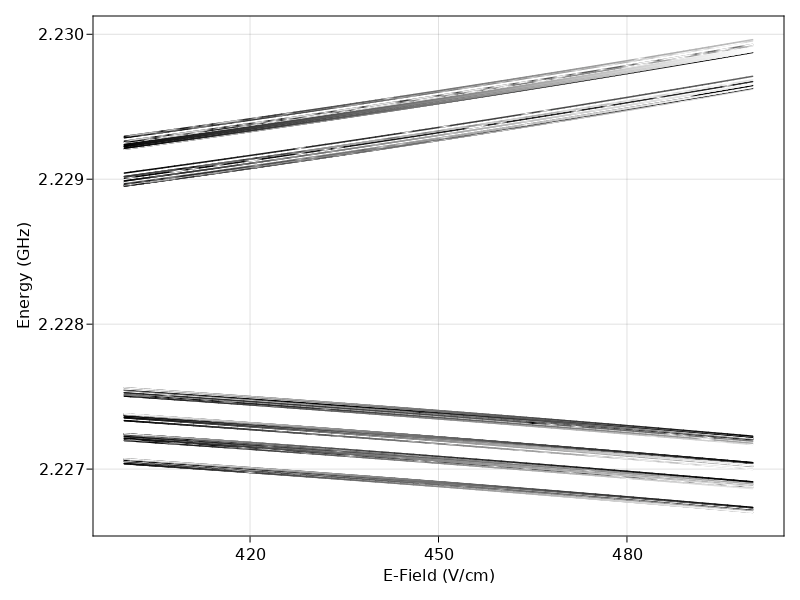

In [8]:
stateOI =  State([0.0, 0.0, 0.5, 1.5, -4.0, 4.0], Hmol)
stateFinal =  State([0.0, 1.0, 0.5, 1.5, -4.0, 4.0], Hmol)
plotting.plotTransitionPlot(Hmol, stateOI, starkScan, "E", N = [1])


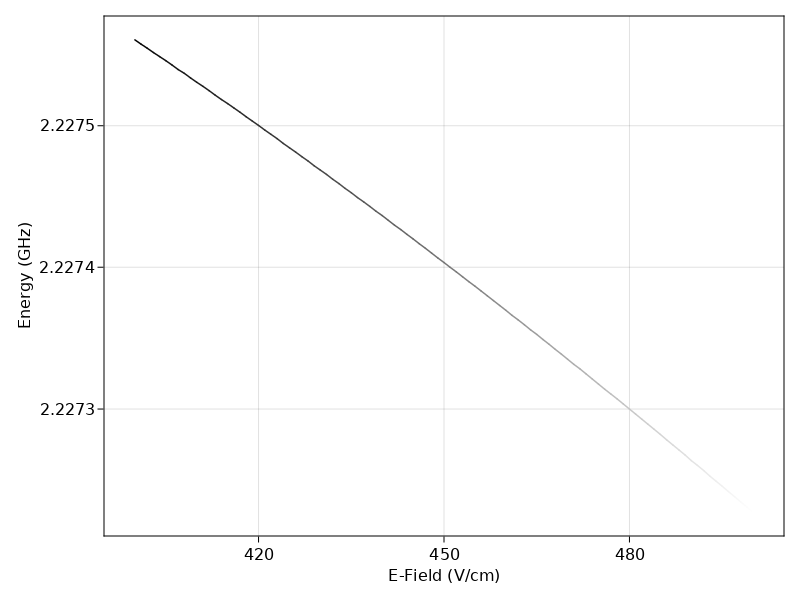

In [11]:
plotting.plotTransitionPlot(Hmol, stateOI, stateFinal, starkScan, "E")

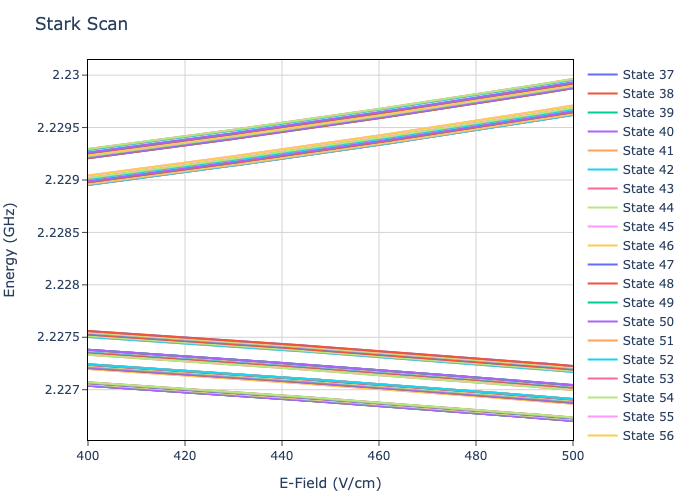

In [10]:
plotting.plotStarkMap(Hmol, starkScan, N =[1])

In [5]:
zeemanScan = solve.scanZeeman(Hmol, [38.910:0.0001:38.916...]*1e-4, 0)#, nev = 10);
avoidedCrossings = calculate.findAvoidedCrossing(stateOI, zeemanScan, [40, 0]*1e-4)

1-element Vector{Any}:
 [0.003891055, 0.16665326160000404]

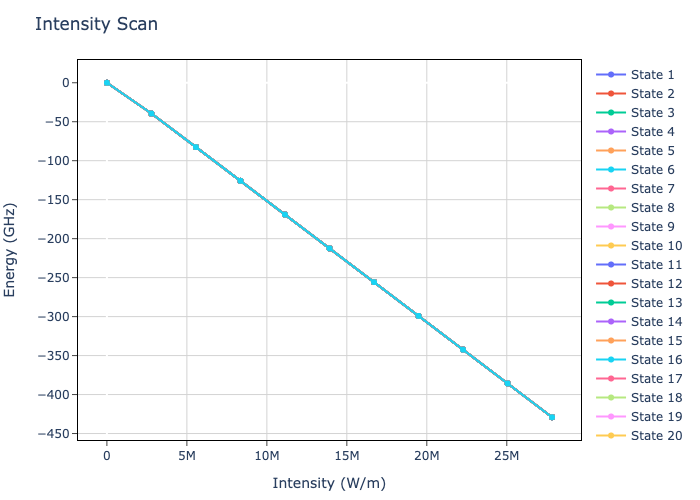

In [8]:
plotting.plotIntensityScan(Hmol_I, IntensityScan, N = [0])

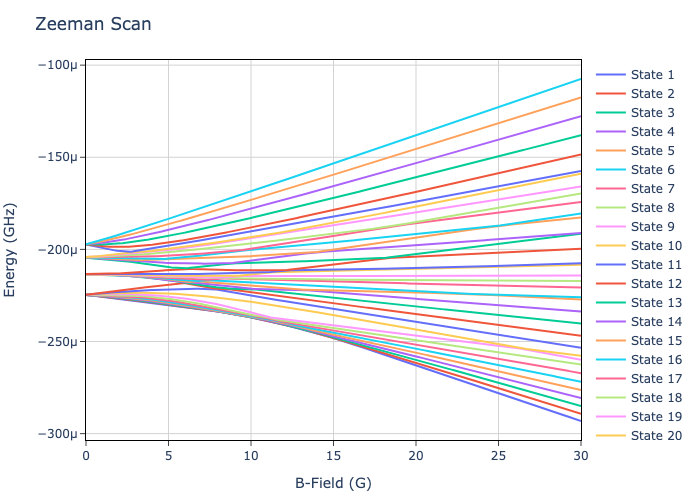

In [13]:
Field_scan = [0:0.1:30...]*1e-4
zeemanScan = solve.scanStark(Hmol, Field_scan, 420e2)#, nev = 10);
stateOI =  State([0.0, 0.0, 0.5, 1.5, -4.0, 4.0], Hmol)
energyScan = calculate.scanDiabiaticEnergy(stateOI, starkScan, [maximum(Field_scan), minimum(Field_scan)], Field = "B")

plotting.plotZeemanMap(Hmol, zeemanScan, N = [0], energyRef = energyScan)

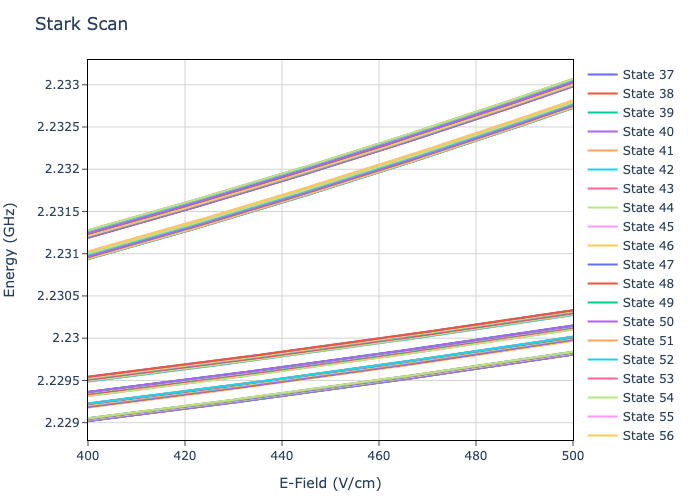

In [9]:
stateOI =  State([0.0, 0.0, 1.5, 1.5, -4.0, 4.0], Hmol)
energyScan = calculate.scanDiabiaticEnergy(stateOI, starkScan, [190, 210]*1e-4, Field = "B")

plotting.plotZeemanMap(Hmol, zeemanScan, N = [1], energyRef = energyScan)